Group 101 ISYE 7406 Project

In [4]:
#general packages
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from collections import Counter
from bs4 import BeautifulSoup

#ml packages
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#nlp packages
from wordcloud import WordCloud
import string
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import tensorflow_hub as hub
from sentence_transformers import SentenceTransformer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

C:\Users\Aaron\anaconda3\envs\textAnalysis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aaron\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
# read in data sets
df1 = pd.read_csv('https://raw.githubusercontent.com/aha1994/Isye7406/main/Emotion(angry).csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/aha1994/Isye7406/main/Emotion(happy).csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/aha1994/Isye7406/main/Emotion(sad).csv')

df = pd.read_csv('https://raw.githubusercontent.com/aha1994/Isye7406/main/emotion.csv')

In [6]:
df.head()

,Unnamed: 0,content,sentiment
0,0,"Sometimes I’m not angry, I’m hurt and there’s ...",angry
1,1,Not available for busy people☺,angry
2,2,I do not exist to impress the world. I exist t...,angry
3,3,Everything is getting expensive except some pe...,angry
4,4,My phone screen is brighter than my future 🙁,angry


In [8]:
len(df)

1822

In [9]:
df['sentiment'].value_counts()

happy    704
angry    598
sad      520
Name: sentiment, dtype: int64

[Text(0.5, 1.0, 'Counts of Status Sentiments'),
 Text(0.5, 0, 'Labeled Sentiment'),
 Text(0, 0.5, 'Count')]

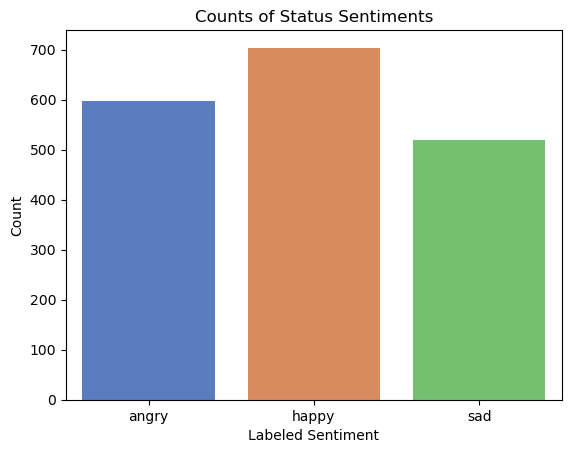

In [10]:
sns.countplot(x='sentiment', data=df,palette='muted').set(title='Counts of Status Sentiments', xlabel='Labeled Sentiment', ylabel='Count')

In [11]:
# Define a function to clean HTML tags
def clean_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [12]:
# Use apply() to clean HTML tags from each row of the DataFrame
df['content'] = df['content'].apply(clean_html_tags)

C:\Users\Aaron\AppData\Local\Temp\ipykernel_30344\3695249093.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [13]:
df.head()

,Unnamed: 0,content,sentiment
0,0,"Sometimes I’m not angry, I’m hurt and there’s ...",angry
1,1,Not available for busy people☺,angry
2,2,I do not exist to impress the world. I exist t...,angry
3,3,Everything is getting expensive except some pe...,angry
4,4,My phone screen is brighter than my future 🙁,angry


In [14]:
# extending stop words
stop_words = set(stopwords.words('english'))
extended_stop_words = stop_words.union(["i'm", "dont", "im"])
print(len(stop_words))
print(len(extended_stop_words))

179
182


In [15]:
df['content'] = df['content'].str.lower()
# Use regular expressions and replace() to remove special characters from the DataFrame
df['content'] = df['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
stop_words = set(stopwords.words('english'))
# Use apply() and lambda to remove stop words from the DataFrame
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
# Initialize stemmer
# stemmer = PorterStemmer()
# Use apply() and lambda to perform stemming on the DataFrame
# df['content'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
# lemmatizer
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
df['content'] = df['content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))
df['content'] = df['content'].str.replace('\d+', '')


C:\Users\Aaron\AppData\Local\Temp\ipykernel_30344\445055450.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('\d+', '')


In [16]:
 df[df["content"].str.contains(r'^\d+')]

,Unnamed: 0,content,sentiment


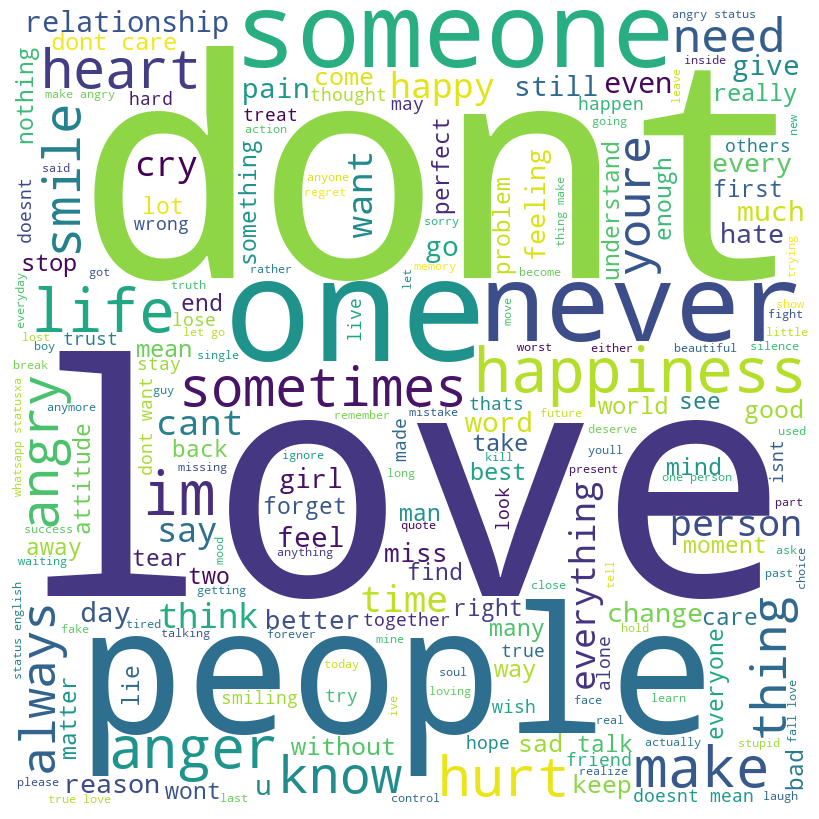

In [17]:
#word cloud

# Combine all rows of text into a single string
all_text = ' '.join(df['content'])

# Initialize WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

# Show the plot
plt.show()

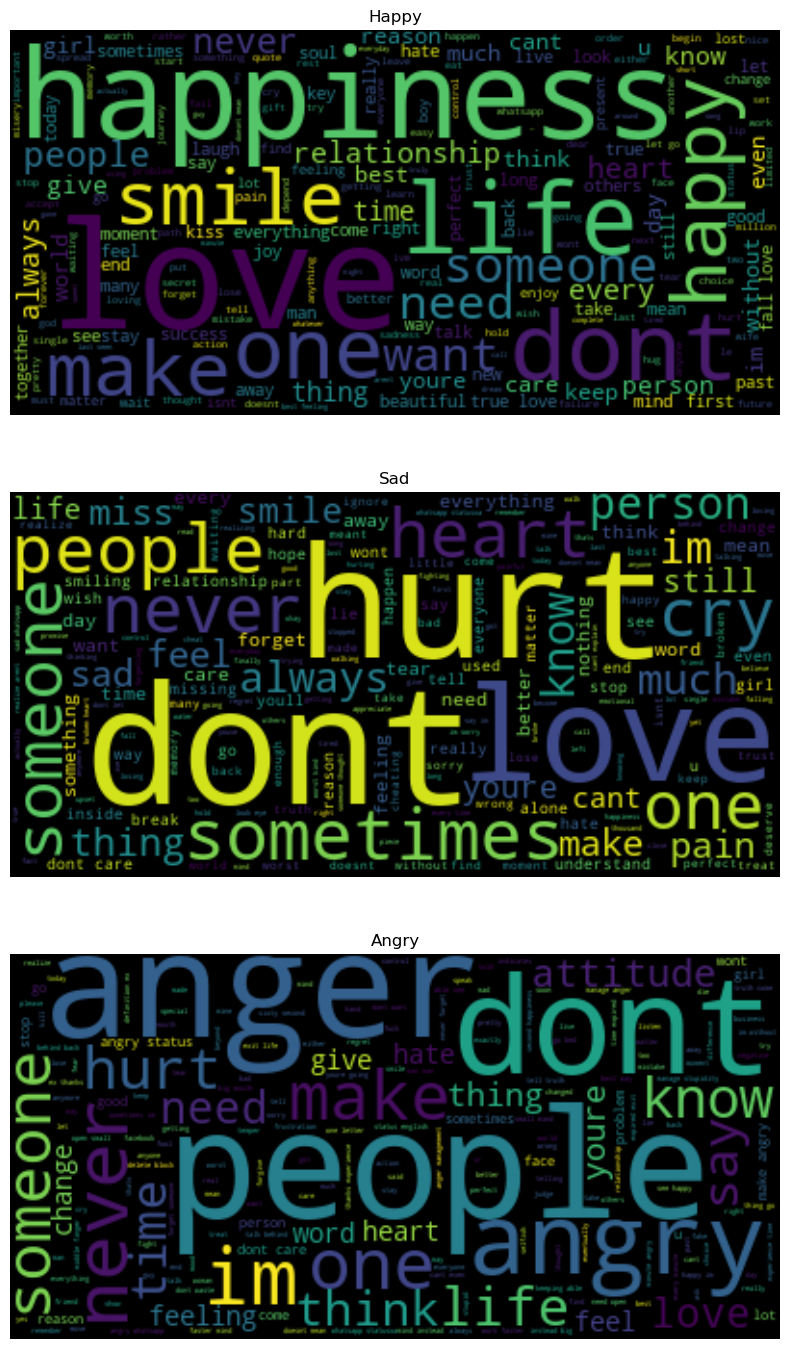

In [18]:
# convert the 'content' column to a string format
df['content'] = df['content'].astype(str)

# group the DataFrame by sentiment
grouped = df.groupby('sentiment')

# create a list of sentiments and their associated data frames
sentiments = ['happy', 'sad', 'angry']
data_frames = [grouped.get_group(s)['content'] for s in sentiments]

# create a list of word cloud titles
titles = ['Happy', 'Sad', 'Angry']

# create a 1x3 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(17, 17))

# plot each word cloud in a separate subplot
for i, ax in enumerate(axes.flatten()):
    # generate word cloud for the i-th group
    text=' '.join(data_frames[i])
    wc = WordCloud( background_color='black').generate(text)

    # plot the word cloud
    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(titles[i])
    ax.axis('off')

# display the plot
plt.show()

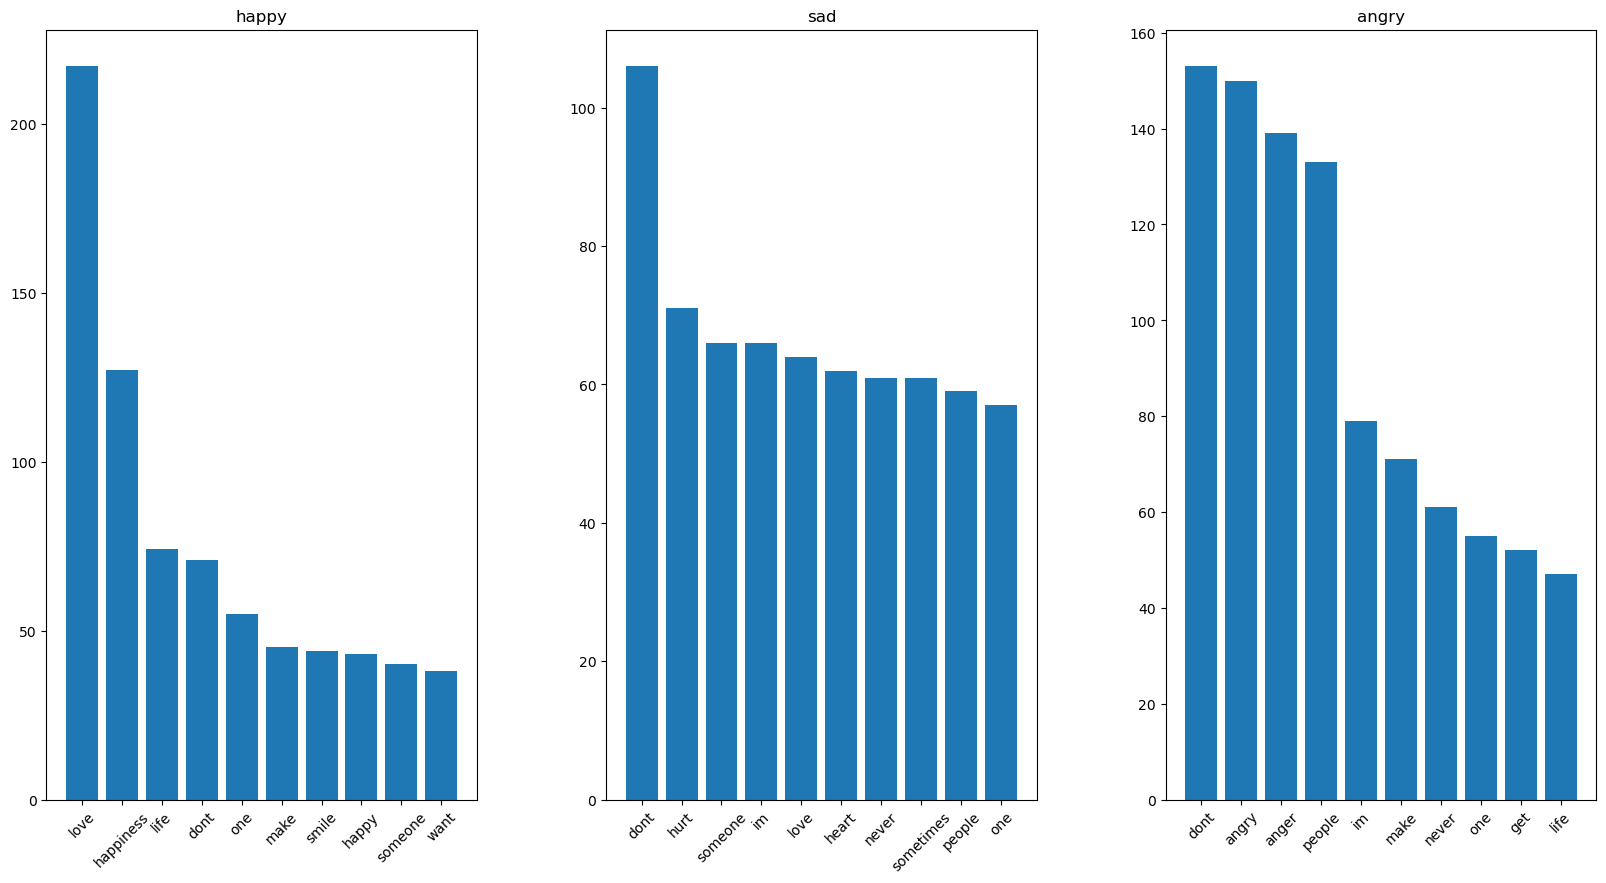

In [19]:
# define a function to get the most common words for a given sentiment
def get_most_common_words(sentiment, n=10):
    words = []
    for text in df.loc[df['sentiment']==sentiment, 'content']:
        words.extend(text.lower().split())
    return Counter(words).most_common(n)

# define a list of sentiments to loop over
sentiments = ['happy', 'sad', 'angry']

# create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(20,10))

# loop over each sentiment and create a bar chart in the corresponding subplot
for i, sentiment in enumerate(sentiments):
    # get the most common words for the sentiment
    word_counts = get_most_common_words(sentiment)
    words = [w[0] for w in word_counts]
    counts = [w[1] for w in word_counts]

    # create a bar chart
    ax = axes[i]
    ax.bar(words, counts)
    ax.set_title(sentiment)
    ax.tick_params(axis='x', rotation=45)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# display the plot
plt.show()

In [20]:
# Classification Model

# can change vectorization methods
#vectorizer = CountVectorizer(stop_words='english')
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(df['content'])
y = df['sentiment']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def print_params(hyperparameters, best_params):
    value = "Optimal parameters: "
    for key in hyperparameters:
        value += str(key) + ": " + str(best_params[key]) + ", "
    if hyperparameters:
        print(value[:-2])

def get_params(estimator, hyperparameters, fit_params={}):
    kfold_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=estimator, param_grid=hyperparameters, n_jobs=-1, cv=kfold_cv, scoring="accuracy")
    model = grid_search.fit(X_train, y_train, **fit_params)
    best_params = model.best_estimator_.get_params()
    print_params(hyperparameters, best_params)
    return model

In [23]:
hyperparameters = {
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['l2'],
    'C'       : [0.01, 0.1, 1.0, 10,100]
}
estimator = LogisticRegression(random_state=1)
best_model_logistic = get_params(estimator, hyperparameters)

Optimal parameters: solver: liblinear, penalty: l2, C: 10


In [24]:

#Train the model
lr = LogisticRegression(solver='liblinear', penalty='l2',C=1.0)
lr.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
acc_svc = accuracy_score(y_test, y_pred)

print(acc_svc)

              precision    recall  f1-score   support

       angry       0.75      0.78      0.76       116
       happy       0.63      0.83      0.71       138
         sad       0.78      0.45      0.57       111

    accuracy                           0.70       365
   macro avg       0.72      0.68      0.68       365
weighted avg       0.71      0.70      0.69       365

0.6958904109589041


In [25]:
# Classification Model
#Train the model
clf = SVC()

clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
acc_svc = accuracy_score(y_test, y_pred)

print(acc_svc)

              precision    recall  f1-score   support

       angry       0.85      0.69      0.76       116
       happy       0.58      0.89      0.70       138
         sad       0.76      0.40      0.52       111

    accuracy                           0.68       365
   macro avg       0.73      0.66      0.66       365
weighted avg       0.72      0.68      0.67       365

0.6767123287671233


In [26]:
#Predict sentiment of new content
new_data = 'I hate how much I love this course'

# Convert the new data into a numerical feature vector using the same vectorizer
new_data_vectorized = vectorizer.transform([new_data])

# Use the trained model to make a prediction
predictionLR = clf.predict(new_data_vectorized)
predictionSVC = clf.predict(new_data_vectorized)

# Print the predicted sentiment
print(predictionLR)
print(predictionSVC)

['happy']
['happy']


In [28]:
# hyperparameters = {
#     'var_smoothing': np.logspace(0, -9, num=100)
# }
# estimator = GaussianNB()
# best_model_gaussian_nb = get_params(estimator, hyperparameters)

In [30]:
hyperparameters = {
    'alpha'     : [0.5, 1.0, 1.5, 2.0, 5],
    'fit_prior' : [True, False],
}
estimator = MultinomialNB()
best_model_multinominal_nb = get_params(estimator, hyperparameters)

Optimal parameters: alpha: 5, fit_prior: False


In [31]:
hyperparameters = {
    'alpha'     : [0.5, 1.0, 1.5, 2.0, 5],
    'fit_prior' : [True, False],
}
estimator = BernoulliNB()
best_model_bernoulli_nb = get_params(estimator, hyperparameters)

Optimal parameters: alpha: 0.5, fit_prior: False


In [32]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize the vectorizer
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))

# Fit the vectorizer on the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Initialize the classifiers
gnb = GaussianNB(var_smoothing= 0.005336699231206307)
mnb= MultinomialNB()
bnb = BernoulliNB(alpha= 0.5, fit_prior= True)

# Train the classifiers on the training data
gnb.fit(X_train_vec.toarray(), y_train)
mnb.fit(X_train_vec, y_train)
bnb.fit(X_train_vec, y_train)

# Vectorize the test data
X_test_vec = vectorizer.transform(X_test)

# Make predictions on the test data using the trained classifiers
y_pred_gnb = gnb.predict(X_test_vec.toarray())
y_pred_mnb = mnb.predict(X_test_vec)
y_pred_bnb = bnb.predict(X_test_vec)

# Calculate the accuracy of the classifiers
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
acc_bnb = accuracy_score(y_test, y_pred_bnb)

# Print the accuracies
print('GaussianNB accuracy:', acc_gnb)
print('MultinomialNB accuracy:', acc_mnb)
print('BernoulliNB accuracy:', acc_bnb)

GaussianNB accuracy: 0.6082191780821918
MultinomialNB accuracy: 0.7013698630136986
BernoulliNB accuracy: 0.7123287671232876


In [33]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Initialize the classifiers
gnb = GaussianNB(var_smoothing= 0.005336699231206307)
mnb = MultinomialNB()
bnb = BernoulliNB(alpha= 0.5, fit_prior= True)

# Train the classifiers on the training data
gnb.fit(X_train_vec.toarray(), y_train)
mnb.fit(X_train_vec, y_train)
bnb.fit(X_train_vec, y_train)

# Vectorize the test data
X_test_vec = vectorizer.transform(X_test)

# Make predictions on the test data using the trained classifiers
y_pred_gnb = gnb.predict(X_test_vec.toarray())
y_pred_mnb = mnb.predict(X_test_vec)
y_pred_bnb = bnb.predict(X_test_vec)

# Calculate the accuracy of the classifiers
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
acc_bnb = accuracy_score(y_test, y_pred_bnb)

# Print the accuracies
print('GaussianNB accuracy:', acc_gnb)
print('MultinomialNB accuracy:', acc_mnb)
print('BernoulliNB accuracy:', acc_bnb)

GaussianNB accuracy: 0.6958904109589041
MultinomialNB accuracy: 0.726027397260274
BernoulliNB accuracy: 0.736986301369863


In [34]:
neg_class_prob_sorted = bnb.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = bnb.feature_log_prob_[1, :].argsort()[::-1]
sad_class_prob_sorted = bnb.feature_log_prob_[2, :].argsort()[::-1]


print(np.take(vectorizer.get_feature_names_out(), neg_class_prob_sorted[:5]))
print(np.take(vectorizer.get_feature_names_out(), pos_class_prob_sorted[:5]))
print(np.take(vectorizer.get_feature_names_out(), sad_class_prob_sorted[:5]))

neg_class_prob_sorted

['people' 'dont' 'angry' 'anger' 'im']
['love' 'happiness' 'dont' 'life' 'one']
['dont' 'hurt' 'people' 'love' 'heart']


array([1286,  502,   60, ..., 1149, 1150,    0], dtype=int64)

In [35]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize the vectorizer
vectorizer = SentenceTransformer('all-mpnet-base-v2')

# Fit the vectorizer on the training data
X_train_vec = pd.DataFrame(np.vstack(X_train.apply(vectorizer.encode)))

# Initialize the classifiers
gnb = GaussianNB(var_smoothing= 0.005336699231206307)
mnb = MultinomialNB()
bnb = BernoulliNB(alpha= 0.5, fit_prior= True)

# Train the classifiers on the training data
gnb.fit(X_train_vec, y_train)
bnb.fit(X_train_vec, y_train)

# Vectorize the test data
X_test_vec = pd.DataFrame(np.vstack(X_test.apply(vectorizer.encode)))


# Make predictions on the test data using the trained classifiers
y_pred_gnb = gnb.predict(X_test_vec)
y_pred_bnb = bnb.predict(X_test_vec)

# Calculate the accuracy of the classifiers
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_mnb = accuracy_score(y_test, y_pred_mnb)
acc_bnb = accuracy_score(y_test, y_pred_bnb)

# Print the accuracies
print('GaussianNB accuracy:', acc_gnb)
print('MultinomialNB accuracy:', acc_mnb)
print('BernoulliNB accuracy:', acc_bnb)

GaussianNB accuracy: 0.6958904109589041
MultinomialNB accuracy: 0.726027397260274
BernoulliNB accuracy: 0.6904109589041096


In [36]:
X_train

859                            dont wait time never right
1022    best relationship lay next talk anything every...
170                            silence best response fool
292                          excuse cheating relationship
1146     true love isnt love first sight love every sight
                              ...                        
1130          best conversation usually happen late night
1294           action blinded eye voice fall deafened ear
860     every difficulty ask two question right would ...
1459                             care much thats get hurt
1126          really want relationship long one happy one
Name: content, Length: 1457, dtype: object

In [37]:
# random forest

# Split the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize the vectorizer
vectorizer1 = CountVectorizer()
vectorizer2 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer3 = SentenceTransformer('all-MiniLM-L6-v2')


def embed_document(data):
    model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
    embeddings = np.array([np.array(model([i])) for i in data])
    return pd.DataFrame(np.vstack(embeddings))


# initialize the classifiers
rfc1 = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=None, max_features='sqrt')
rfc2 = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=None, max_features='sqrt')
rfc3 = RandomForestClassifier()
rfc4 = RandomForestClassifier()


# Fit the vectorizers on the training data
X_train_vec1 = vectorizer1.fit_transform(X_train)
X_train_vec2 = vectorizer2.fit_transform(X_train)
X_train_vec3 = pd.DataFrame(np.vstack(X_train.apply(vectorizer3.encode)))
X_train_vec4 = embed_document(X_train)


# fit the training data
rfc1.fit(X_train_vec1, y_train)
rfc2.fit(X_train_vec2, y_train)
rfc3.fit(X_train_vec3, y_train)
rfc4.fit(X_train_vec4, y_train)


# vectorize the testing set
X_test_vec1 = vectorizer1.transform(X_test)
X_test_vec2 = vectorizer2.transform(X_test)
X_test_vec3 = pd.DataFrame(np.vstack(X_test.apply(vectorizer3.encode)))
X_test_vec4 = embed_document(X_test)

# predict
rfc_pred1 = rfc1.predict(X_test_vec1)
rfc_pred2 = rfc2.predict(X_test_vec2)
rfc_pred3 = rfc3.predict(X_test_vec3)
rfc_pred4 = rfc4.predict(X_test_vec4)

# Calculate the accuracy for rfc with each vectorizer
acc_rfc1 = accuracy_score(y_test, rfc_pred1)
acc_rfc2 = accuracy_score(y_test, rfc_pred2)
acc_rfc3 = accuracy_score(y_test, rfc_pred3)
acc_rfc4 = accuracy_score(y_test, rfc_pred4)



# results
print('RandomForest accuracy with CountVectorizer: ', acc_rfc1)
print('RandomForest accuracy with TfidfVectorizer: ', acc_rfc2)
print('RandomForest accuracy with BERT: ', acc_rfc3)
print('RandomForest accuracy with USE: ', acc_rfc4)



RandomForest accuracy with CountVectorizer:  0.7178082191780822
RandomForest accuracy with TfidfVectorizer:  0.6547945205479452
RandomForest accuracy with BERT:  0.7123287671232876
RandomForest accuracy with USE:  0.7068493150684931


In [38]:
# # neural net hyperparams

# # random forest classifier hyperparams
# hyperparameters = {
#     'alpha' : [0.00001, 0.0001, 0.001]
# }
# estimator = MLPClassifier(random_state=42)
# best_model_rfc = get_params(estimator, hyperparameters)

In [39]:
# neural net classifier

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize the vectorizer
vectorizer1 = CountVectorizer()
vectorizer2 = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2))
vectorizer3 = SentenceTransformer('all-mpnet-base-v2')

# initialize the classifiers
nnc1 = MLPClassifier(random_state=42, alpha = 0.00001, max_iter=1000, hidden_layer_sizes = (200,))
nnc2 = MLPClassifier(random_state=42, alpha = 0.00001, max_iter=1000, hidden_layer_sizes = (100,))
nnc3 = MLPClassifier(random_state=42, alpha = 0.00001, max_iter=1000, hidden_layer_sizes = (100,))
nnc4 = MLPClassifier(random_state=42, alpha = 0.00001, max_iter=1000, hidden_layer_sizes = (100,))


# Fit the vectorizers on the training data
X_train_vec1 = vectorizer1.fit_transform(X_train)
X_train_vec2 = vectorizer2.fit_transform(X_train)
X_train_vec3 = pd.DataFrame(np.vstack(X_train.apply(vectorizer3.encode)))
X_train_vec4 = embed_document(X_train)

# fit the training data
nnc1.fit(X_train_vec1, y_train)
nnc2.fit(X_train_vec2, y_train)
nnc3.fit(X_train_vec3, y_train)
nnc4.fit(X_train_vec4, y_train)


# vectorize the testing set
X_test_vec1 = vectorizer1.transform(X_test)
X_test_vec2 = vectorizer2.transform(X_test)
X_test_vec3 = pd.DataFrame(np.vstack(X_test.apply(vectorizer3.encode)))
X_test_vec4 = embed_document(X_test)

# predict
nnc_pred1 = nnc1.predict(X_test_vec1)
nnc_pred2 = nnc2.predict(X_test_vec2)
nnc_pred3 = nnc3.predict(X_test_vec3)
nnc_pred4 = nnc4.predict(X_test_vec4)

# Calculate the accuracy for rfc with each vectorizer
acc_nnc1 = accuracy_score(y_test, nnc_pred1)
acc_nnc2 = accuracy_score(y_test, nnc_pred2)
acc_nnc3 = accuracy_score(y_test, nnc_pred3)
acc_nnc4 = accuracy_score(y_test, nnc_pred4)

# results
print('Nerual Net accuracy with CountVectorizer: ', acc_nnc1)
print('Neural Net accuracy with TfidfVectorizer: ', acc_nnc2)
print('Neural Net accuracy with Bert: ', acc_nnc3)
print('Neural Net accuracy with USE: ', acc_nnc4)

Nerual Net accuracy with CountVectorizer:  0.6547945205479452
Neural Net accuracy with TfidfVectorizer:  0.673972602739726
Neural Net accuracy with Bert:  0.673972602739726
Neural Net accuracy with USE:  0.6465753424657534


In [40]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)
# Initialize the vectorizer
vectorizer = CountVectorizer()
# Fit the vectorizer on the training data
X_train_vec = vectorizer.fit_transform(X_train)
bnb = BernoulliNB(alpha= 0.5, fit_prior= True)
bnb.fit(X_train_vec, y_train)


# testing predictions from the models
new_status = 'I hate how much I love this course'

tfid_new_status = vectorizer2.transform([new_status])
vectorized_new_status_counter = vectorizer1.transform([new_status])
bert_new_status = vectorizer3.encode(new_status).reshape(1, -1)



print(f"The Random Forest model with USE predicts: {rfc4.predict(embed_document([new_status]))[0]}")
print()
print(f"The Bernoulie Naive Bayes with Count predicts: {bnb.predict(vectorized_new_status_counter)[0]}")
print()
print(f"The Neural Net model with BERT predicts: {nnc3.predict(bert_new_status)[0]}")
print()


The Random Forest model with USE predicts: angry

The Bernoulie Naive Bayes with Count predicts: happy

The Neural Net model with BERT predicts: angry



In [41]:
# testing extraction of feature importance from the tfid vectorizer  model

features = vectorizer2.get_feature_names_out()
importances = rfc2.feature_importances_

feat_imp_df = pd.DataFrame({
    'Features': features,
    "Importances": importances
})
feat_imp_df.head(25).sort_values(by=['Importances'], ascending = False)

,Features,Importances
4,able,5.048494e-04
6,able happy,4.607486e-04
11,accept,4.158163e-04
2,ability,1.035570e-04
3,ability success,9.621258e-05
15,accept fact,5.521250e-05
7,able haunt,5.440427e-05
19,acceptance,3.429705e-05
12,accept arent,3.391746e-05
20,acceptance evil,2.922175e-05


In [42]:
# testing extraction of feature importance from the Count vectorizer  model

features1 = vectorizer1.get_feature_names_out()
importances1 = rfc1.feature_importances_

feat_imp_df1 = pd.DataFrame({
    'Features': features1,
    "Importances": importances1
})
feat_imp_df1.head(25).sort_values(by=['Importances'], ascending = False)

,Features,Importances
2,able,0.000775
16,actually,0.000728
4,accept,0.000723
15,action,0.000709
13,act,0.000662
19,addition,0.000563
9,account,0.000487
23,advice,0.000298
21,admit,0.000279
1,ability,0.000211
